# 01 – Data Exploration

This notebook explores the raw loan dataset to understand:
- Feature distributions
- Missing values
- Class imbalance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Note: CSV has no header row, so use header=None
df = pd.read_csv("../data/raw/loan_data.csv", header=None)
df.head()

Matplotlib is building the font cache; this may take a moment.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [3]:
df.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [4]:
# Load & Label the Data
import numpy as np

cols = [
    "gender", "age", "debt", "marital_status", "bank_customer",
    "education", "ethnicity", "years_employed",
    "prior_default", "employed", "credit_score",
    "drivers_license", "citizen", "zip_code",
    "income", "approval"
]

df = pd.read_csv("../data/raw/loan_data.csv", header=None, names=cols)

# Clean data: replace "?" with NaN and drop rows with missing values
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

# Convert numeric columns to proper types
df["income"] = pd.to_numeric(df["income"])
df["years_employed"] = pd.to_numeric(df["years_employed"])

# Map approval labels to binary
df["approval"] = df["approval"].map({"+": 1, "-": 0})

df

,gender,age,debt,marital_status,bank_customer,education,ethnicity,years_employed,prior_default,employed,credit_score,drivers_license,citizen,zip_code,income,approval
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,0


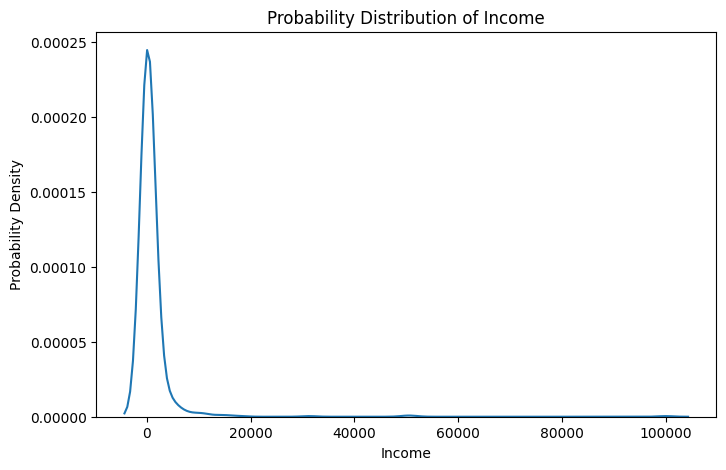

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="income")

plt.title("Probability Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Probability Density")
plt.show()


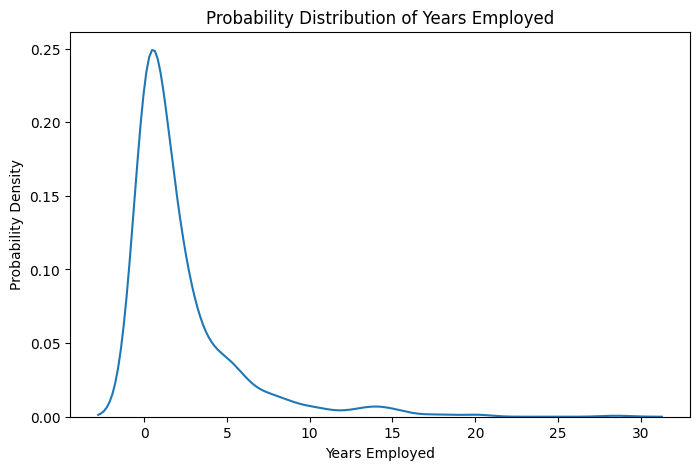

In [6]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="years_employed")

plt.title("Probability Distribution of Years Employed")
plt.xlabel("Years Employed")
plt.ylabel("Probability Density")
plt.show()

In [7]:
features = ["income","years_employed"]

X=df[features]
y=df["approval"]

In [8]:
df["approval"].value_counts()

approval
0    357
1    296
Name: count, dtype: int64

In [9]:
# Add this to visualize class distribution
print("Class Distribution:")
print(df['approval'].value_counts(normalize=True))
# Narrative: This helps us decide if accuracy is a reliable metric. 
# If one class is 90%, we'll need Precision/Recall.

Class Distribution:
approval
0    0.546708
1    0.453292
Name: proportion, dtype: float64


# Data Summary

The dataset contains loan application data with a mix of numerical and categorical features. The target variable is 'approval' (originally '+' and '-'). Initial inspection shows a balanced/imbalanced distribution which will influence our choice of evaluation metrics.